In [ ]:
#pip install opencv-python

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

In [3]:
model = tf.keras.models.load_model('safety_gear_detect_V4.keras')


Predicted Class: neg

Confidence Score: 0.8993491530418396


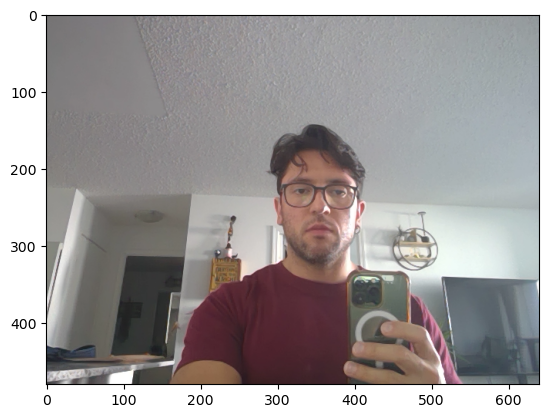

In [117]:
#display camera, press q to capture and analyze
cap = cv2.VideoCapture(1) # using CV2 to capture images using the webcam n in the system (on my laptop 0 is back 1 is front cam

while True: #dispay until we escape the loop
    ret, frame = cap.read() #get the frame from video capture device (actual image), ret --> true or False if the image was captured
    
    cv2.imshow('frame', frame) #display the image
    
    if cv2.waitKey(1) == ord('q'): # wait 1ms to see if we pressed 'q' to exit the while loop
        break
        
cap.release() #release cameras to be used 
cv2.destroyAllWindows() #close all 

im_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #transform from BGR to RGB
plt.imshow(im_RGB)

#preprocess image
preprocessed_image = cv2.resize(im_RGB, (400, 400))
preprocessed_image = np.array(preprocessed_image) / 255.0

#predict the class using the image
predic = model(np.expand_dims(preprocessed_image, axis = 0))
labels = ['pos', 'neg']

preds_class = np.argmax(predic)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {predic[0][preds_class]}')

In [116]:
#capture images every 5 seconds and analyze live
cap = cv2.VideoCapture(1) # using CV2 to capture images using the webcam n in the system (on my laptop 0 is back 1 is front cam

while True: #dispay until we escape the loop
    ret, frame = cap.read() #get the frame from video capture device (actual image), ret --> true or False if the image was captured
    
    cv2.imshow('frame', frame) #display the image

    im_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #transform from BGR to RGB
    #plt.imshow(im_RGB)

    #preprocess image
    preprocessed_image = cv2.resize(im_RGB, (400, 400))
    preprocessed_image = np.array(preprocessed_image) / 255.0

    #predict the class using the image
    predic = model(np.expand_dims(preprocessed_image, axis = 0))
    labels = ['pos', 'neg']

    preds_class = np.argmax(predic)
    preds_label = labels[preds_class]

    print(f'\nPredicted Class: {preds_label}')
    print(f'\nConfidence Score: {predic[0][preds_class]}')
    
    if cv2.waitKey(5000) == ord('q'): # wait 1ms to see if we pressed 'q' to exit the while loop
        break
        
cap.release() #release cameras to be used 
cv2.destroyAllWindows() #close all 


Predicted Class: neg

Confidence Score: 0.9999529719352722

Predicted Class: neg

Confidence Score: 0.9282161593437195

Predicted Class: neg

Confidence Score: 0.9321243166923523

Predicted Class: neg

Confidence Score: 0.9188458323478699

Predicted Class: neg

Confidence Score: 0.999017596244812

Predicted Class: neg

Confidence Score: 0.9902176260948181

Predicted Class: neg

Confidence Score: 0.8823387622833252

Predicted Class: neg

Confidence Score: 0.8530216217041016


In [26]:
cap = cv2.VideoCapture(1) # using CV2 to capture images using the webcam n in the system (on my laptop 0 is back 1 is front cam

while True: #dispay until we escape the loop
    ret, frame = cap.read() #get the frame from video capture device (actual image), ret --> true or False if the image was captured
    
    cv2.imshow('frame', frame) #display the image

    if cv2.waitKey(1) == ord('q'): # wait 1ms to see if we pressed 'q' to exit the while loop
        break

cap.release() #release cameras to be used 
cv2.destroyAllWindows() #close all 